# Decision Tree Classifier

This exercise explores the significance of various features to classification with a simple decision tree model.

### Load Data

In [47]:
#import pandas
import pandas as pd 

# define csv read
def read_data2(filename):
    # read in csv
    df = pd.read_csv(filename, sep='\t', encoding='utf-8')
    
    #limit df content to bias, text, headline, and source
    df = df.loc[:, ['bias', 'text', 'headline', 'source', 'date', 'sentiment', 'magnitude', 'length', 'sentences', 'reading']]
    
    # convert bias numbers to labels
    df['bias'] = df['bias'].replace({1:'Left', 2:'Center', 3:'Right'})
    
    return df

# load cleaned file with sentiment data
new = read_data2('news-corpus-df-clean.csv')
new.head()

,bias,text,headline,source,date,sentiment,magnitude,length,sentences,reading
0,Left,melania trump appears plagiarized speech openi...,melania trump plagiarized michelle obama woman...,Daily Beast,2016-07-19,0.0,13.1,901,51,11.4
1,Left,federal communications commission took aim sig...,fcc plan would give internet providers power c...,Washington Post,2017-11-21,-0.1,11.0,957,39,16.4
2,Left,radical idea live miles south canadian border ...,opinion bernie sanders need medicare,New York Times,2017-09-13,0.0,3.0,379,18,12.6
3,Right,democrats indicated sunday decision attorney g...,attorney general jeff sessions testify senate ...,Washington Times,2017-06-12,-0.1,9.9,1096,86,11.7
4,Left,california highway patrol takes pride able saf...,lapd chief mayor warn taking anti trump protes...,Los Angeles Times,2016-11-10,0.0,0.6,62,2,19.8


In [48]:
# clip dataset of overly short / lengthy texts
new = new[new.length > 200]
new = new[new.length < 2500]

### Encode Categorical Labels

In [37]:
# encode categorical labels as class values
from sklearn import preprocessing, tree
import copy

new_tree = copy.deepcopy(new)

encode = preprocessing.LabelEncoder()
encode.fit(new_tree['source'].values.tolist())

new_tree['source'] = encode.transform(new_tree['source'].values.tolist())

### Alternative Encoding

In [50]:
# alternative encoding
from sklearn import preprocessing

new_tree = copy.deepcopy(new)

lb = preprocessing.LabelBinarizer()
lb.fit(new_tree['source'].values.tolist())

In [53]:
lb.classes_

array(['ABC News', 'AllSides', 'American Spectator', 'American Thinker',
       'Associated Press', 'Axios', 'BBC News', 'Ben Shapiro',
       'Ben Stein', 'Bloomberg', 'Breitbart News', 'Business Insider',
       'Bustle', 'Buzzfeed', 'CBN', 'CBS News', 'CNBC', 'CNET',
       'CNN (Web News)', 'CNN - Editorial', 'Charles Krauthammer',
       'Chicago Tribune', 'Christian Science Monitor',
       'Commentary Magazine', 'Conservative HQ', 'Daily Beast',
       'Daily Kos', 'Daily Mail', 'Daily Press', 'David Brooks',
       'David Ignatius', 'Democracy Now', 'Eugene Robinson', 'Forbes',
       'Fox News', 'Fox News Editorial', 'Frank Bruni', 'George Will',
       'Guest Writer', 'Guest Writer - Left', 'Guest Writer - Right',
       'HotAir', 'HuffPost', "Investor's Business Daily", 'Jeff Jacoby',
       'Joan Blades', 'John Gable, AllSides Founder', 'John Stossel',
       'Julian Zelizer', 'Lifehacker', 'Listen First Project',
       'Los Angeles Times', 'MSNBC', 'Mashable', 'Mediaite',

In [55]:
new_tree['source'] = lb.transform(new_tree['source'].values.tolist())

### Fit Classifier

In [56]:
# subset data frame into features and outcomes
features = new_tree.loc[:, ['source', 'magnitude', 'sentiment', 'sentences', 'reading']]
outcomes = new_tree.loc[:, ['bias']]
features.head()

,source,magnitude,sentiment,sentences,reading
0,0,13.1,0.0,51,11.4
1,0,11.0,-0.1,39,16.4
2,0,3.0,0.0,18,12.6
3,0,9.9,-0.1,86,11.7
5,0,8.5,-0.1,40,11.6


In [39]:
outcomes_target_names = np.asarray(['Left', 'Center', 'Right'])

In [40]:
newsy = {'data': features.values, 'feature_names':list(features.columns.values), 'target':outcomes.values, 'target_names':outcomes_target_names}

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(newsy['data'], newsy['target'])

In [42]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("newsy") 

'newsy.pdf'

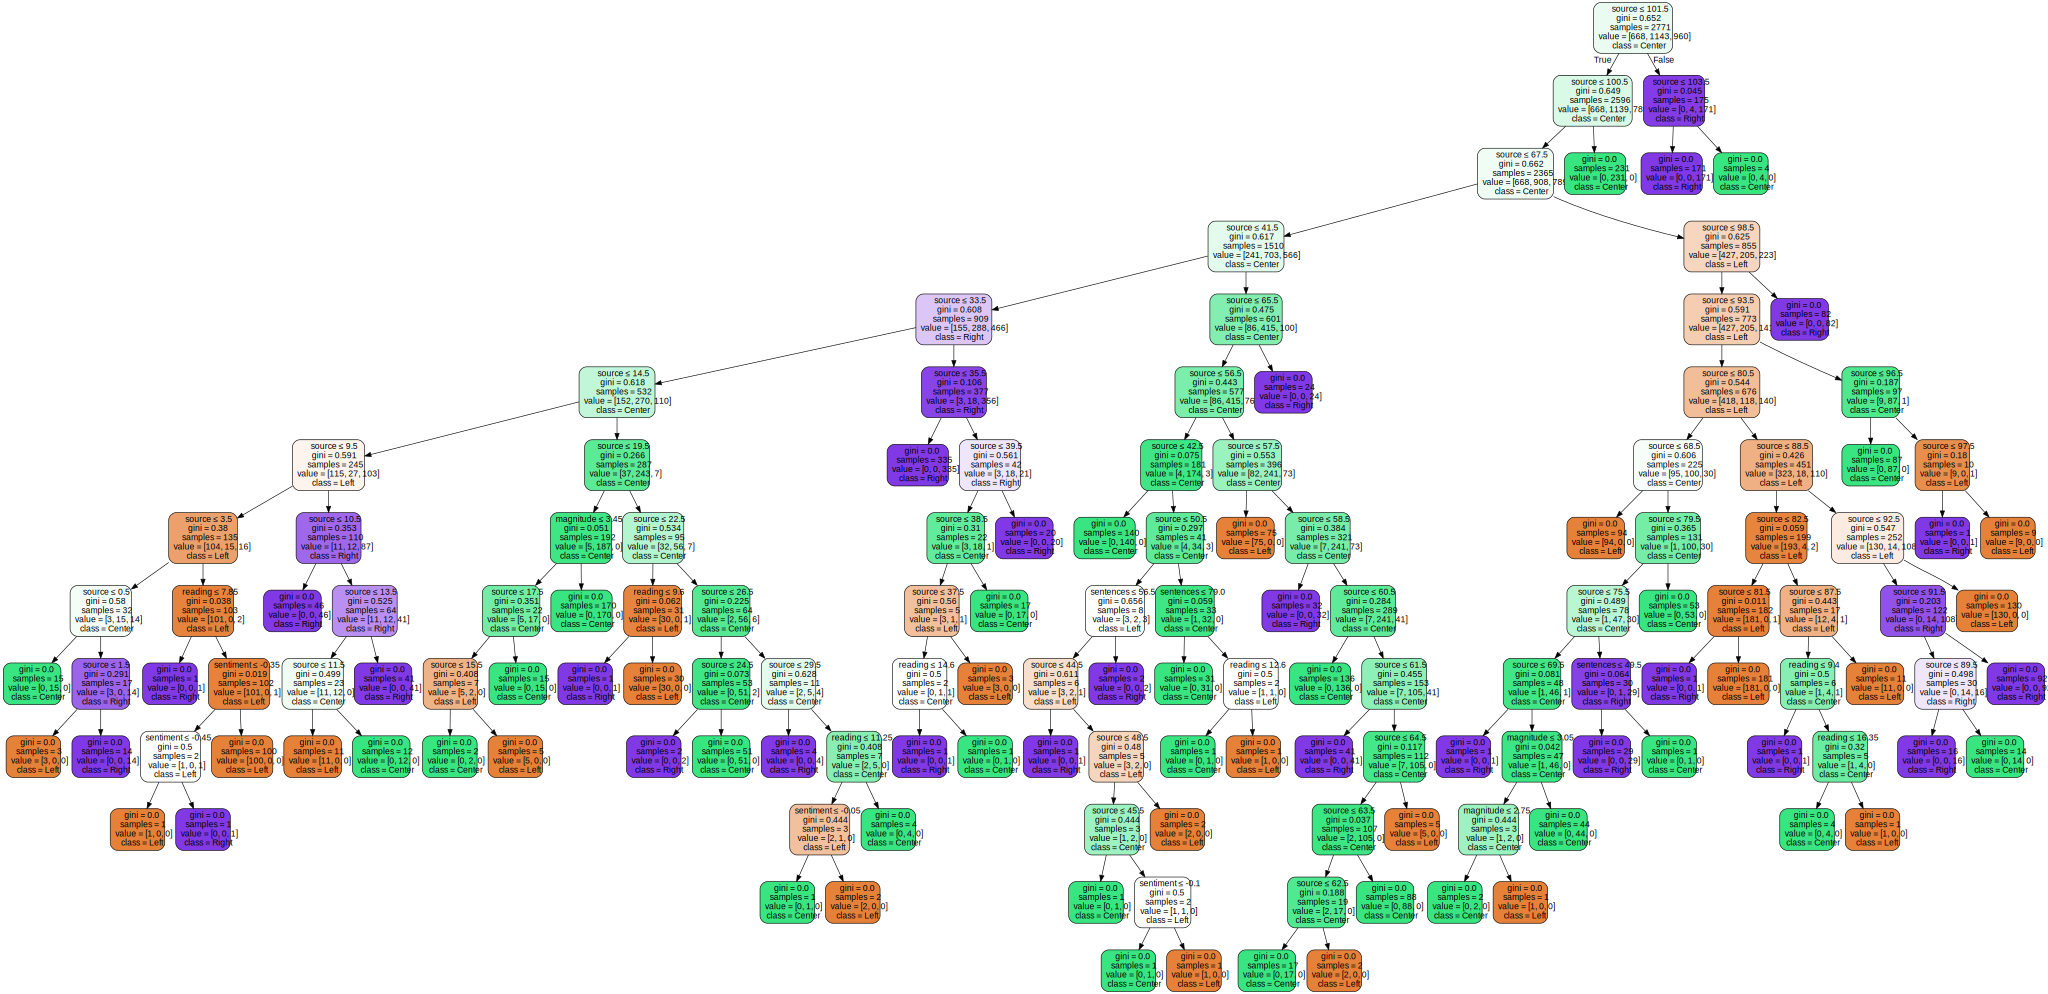

In [43]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=newsy['feature_names'],  
                         class_names=newsy['target_names'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [44]:
graph.render("newsy") 

'newsy.pdf'